# ECSE 415
## Assignment 3
### Abbas Yadollahi - 260680343

## 1. Segmentation

### 1.1. K-means Clustering and Expectation Maximization

#### 1.1.1. K-means Clustering Maximization

In [13]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read home image (in RGB) as a numpy array
img = np.array(cv2.cvtColor(cv2.imread('./home.jpg'), cv2.COLOR_BGR2RGB))

In [6]:
def plotFigures(images, size=4):
    """
    :param images: List of images to display
    """

    plt.figure(figsize=(15, 15))
    for i, image in enumerate(images, 1):
        plt.subplot(size, size, i), plt.imshow(image['image'])
        plt.title(image['title']), plt.axis('off')
    plt.show()

In [7]:
def kMeansCluster(img, k, iterations=10):
    """
    :param img: Input image
    :param k: Number of cluster centers
    :param iterations: Maximum number of iterations
    """

    _, _, d = img.shape
    
    # Init cluster centers
    centers = np.random.random_sample((k, d)) * np.max(img)
    
    images = []
    for i in range(iterations):
        # Find distances and compute the cluster centers
        distances = np.array([img - c for c in centers])
        distances = np.linalg.norm(distances, axis=-1)
        clusters = np.argmin(distances, axis=0)
        images.append({
            'image': clusters,
            'title': 'K-Means Clustering\nCluster Centers {}'.format(k)
        })
        
        # Create a new cluster centers
        new_centers = np.zeros(shape=(k, d))
        for c in range(k):
            new_centers[c] = np.mean(img[clusters == c], axis=0)
        centers = new_centers

    return images

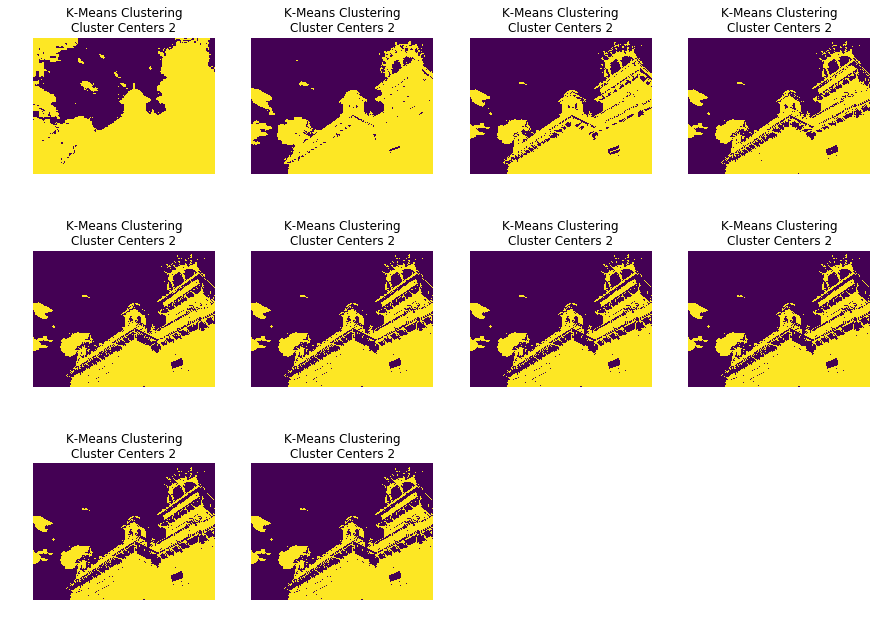

In [8]:
images = kMeansCluster(img, 2)
plotFigures(images)

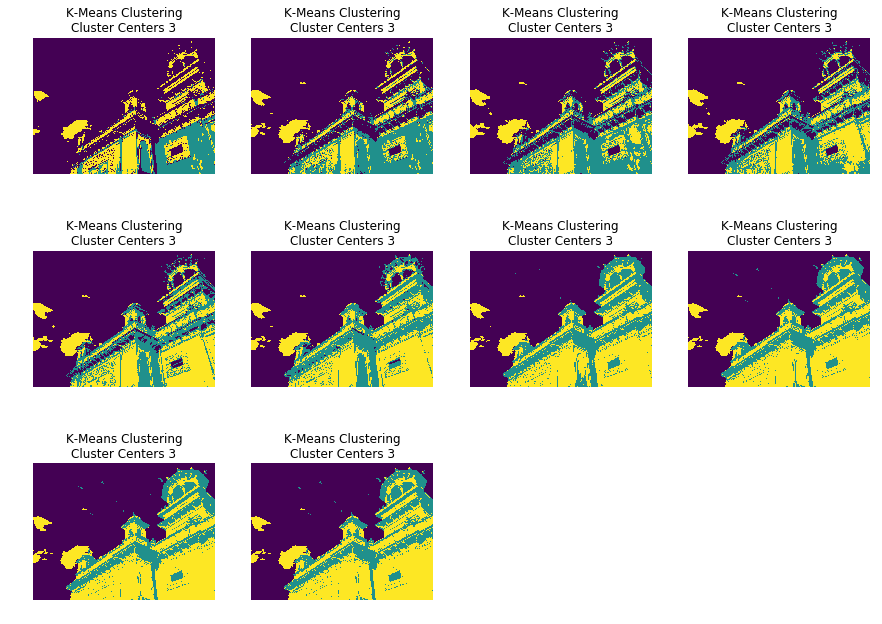

In [9]:
images = kMeansCluster(img, 3)
plotFigures(images)

#### 1.1.2. Expectation Maximization

In [16]:
def expectationMaximization(img, k, iterations=10):
    """
    :param img: Input image
    :param k: Number of Gaussian components
    :param iteration: Maximum number of iterations
    """

    def gaussianDistribution(x, mu, sigma):
        nom = np.power(math.e, -0.5 * np.power((x - mu)/sigma, 2))
        denom = math.sqrt(2 * math.pi) * sigma
        return np.linalg.norm(nom/denom, axis=-1)
        
    def expectation(img, pi, mu, sigma, k):
        h, w, _ = img.shape
        exp = np.empty(shape=(h, w, k))
        for i in range(h):
            for j in range(w):
                exp[i][j] = gaussianDistribution(img[i][j], mu, sigma)
        
        sum_e = np.sum(exp * pi, axis=-1)
        sum_e = sum_e.reshape((h, w, 1))
        
        return exp/sum_e
    
    def maximization(img, exp, pi, mu, sigma, k):
        h, w, _ = img.shape
        clusters = np.argmax(exp, axis=-1)
        
        for i in range(k):
            c = 0
            for j in range(h):
                for k in range(w):
                    c += exp[j, k, i] * img[j, k]
            mu[i] = c / np.sum(exp[:, :, i])
            x = img[clusters == i]
            sigma[i] = np.sqrt(np.var(x, axis=0))
            pi[i] = np.size(x) / np.size(img)
        return clusters
    
    _, _, d = img.shape
    
    pi = np.random.rand(k)
    pi = pi / np.sum(pi)
    mu = np.random.random((k, d)) * 255
    sigma = np.full((k, d), 255/k)
        
    images = []
    for i in range(iterations):
        exp = expectation(img, pi, mu, sigma, k)
        clusters = maximization(img, exp, pi, mu, sigma, k)
        images.append({
            'image': clusters,
            'title': 'Expectation Maximum\nGaussian Components {}'.format(k)
        })

    return images

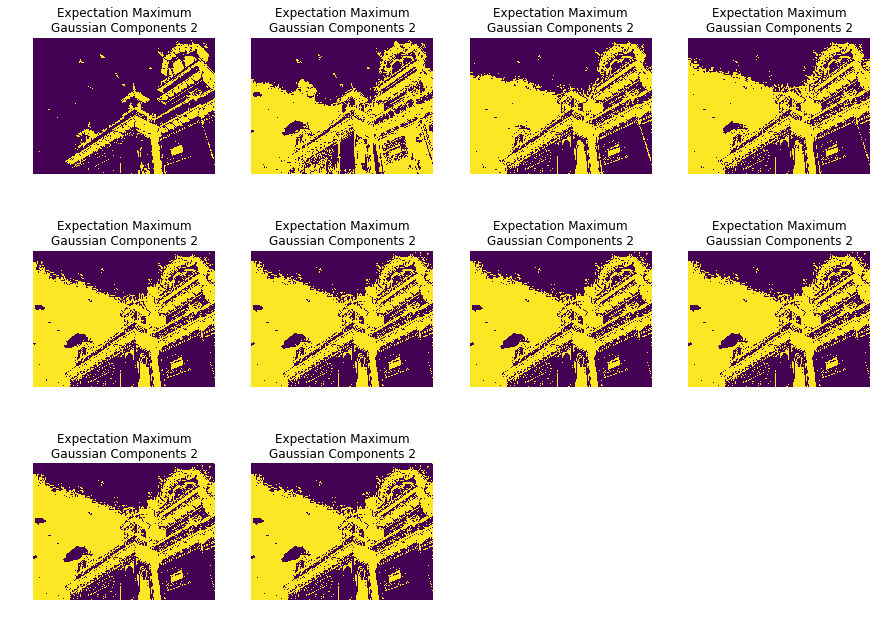

In [17]:
images = expectationMaximization(img, 2)
plotFigures(images)

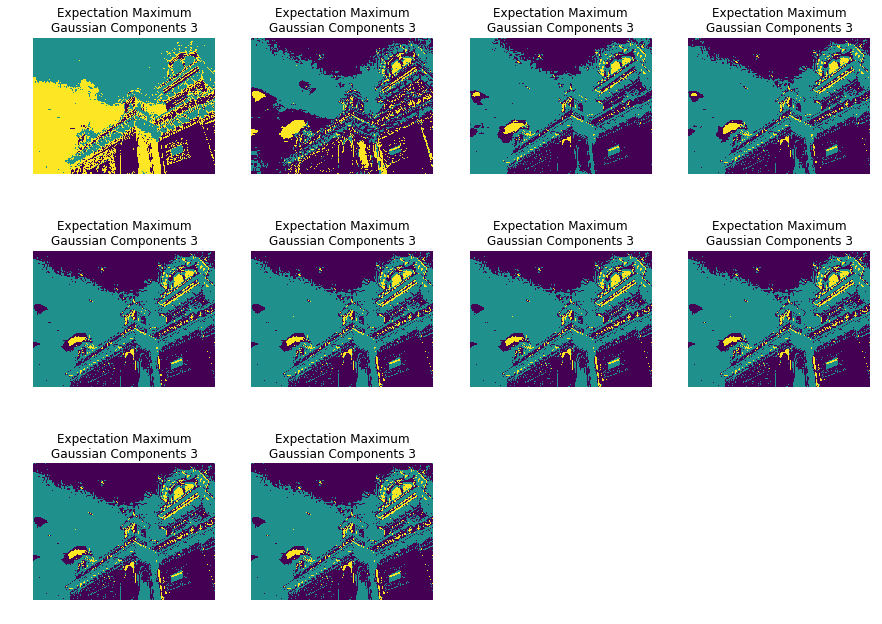

In [19]:
images = expectationMaximization(img, 3)
plotFigures(images)

**Under what data distribution conditions would K-means and EM give the
same solution, provided similar initializations?**

Computing K-means and EM should give the same result since they are just variants of each other, although with K-means being biased towards spherical clusters seeing as it uses the L2 Norm. On the hand, Expectation Maximization uses the probability of a point being part of a cluster, without assumption of the clusters being spherical. As a result, both methods should give similar results when the data is scattered in really defined clusters.